# Clustering-Based Market Segmentation for Electric Vehicle Adoption in India

## Problem Statement

#### The project aims to segment consumers based on their age, gender and knowledge, attitude, and practice (KAP) towards electric vehicles (EVs) in India. By clustering respondents, the study will help companies understand consumer behavior and target marketing strategies effectively.

In [3]:
# Data handling
import pandas as pd  
import numpy as np  

# Data visualization
import matplotlib.pyplot as plt  
import seaborn as sns  

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder  

# Clustering
from sklearn.cluster import KMeans  
from scipy.cluster.hierarchy import dendrogram, linkage  

# Evaluation
from sklearn.metrics import silhouette_score  

In [4]:
responses = pd.read_excel("Response.xlsx")

In [5]:
print(responses.head())

   What is your gender?   What is your age?   What is your occupation?  K1  \
0                      1                   1                       1.0   1   
1                      2                   2                       2.0   2   
2                      1                   3                       3.0   1   
3                      1                   4                       1.0   2   
4                      2                   1                       2.0   3   

   K2  K3  K4  K5  ATT1  ATT2  ATT3  ATT4  ATT5  P1  P2  P3  P4  P5  
0   1   1   1   1     1     1     1     1     1   1   1   1   1   1  
1   2   2   2   2     2     2     2     2     2   2   2   2   2   2  
2   1   1   1   1     1     1     1     1     1   1   1   1   1   1  
3   2   2   2   2     2     2     2     2     2   2   2   2   2   2  
4   3   3   3   3     3     3     3     3     3   3   3   3   3   3  


### Understanding the categories

    gender---1,2---Male,Female  
    Age-----1---18 to 24 years, 2----25 to 31 years,  3---32 to 38 years,  4---38+ years  
    K--K1=I can correctly define what an electric vehicle (EV) is.  
    K2= I understand the environmental benefits of using electric vehicles.  
    K3	I am aware of the government policies and incentives related to electric vehicle adoption in India.  
    K4	I know where I can find information about charging stations for electric vehicles in my area.  
    K5	I am familiar with the different types of electric vehicle technologies, such as battery electric vehicles (BEVs) and plug-in hybrid electric vehicles (PHEVs).    
    ATT1	I believe that electric vehicles are a more environmentally friendly option compared to traditional gasoline/diesel vehicles.  
    ATT2	I think that owning an electric vehicle would lead to cost savings in the long run.  
    ATT3	I have a positive attitude toward the performance and driving experience of electric vehicles.  
    ATT4	I support government incentives and policies that promote electric vehicle adoption.  
    ATT5	I believe that the availability of a charging infrastructure is a crucial factor for the success of electric vehicles.  
    P1	I have driven or ridden in an electric vehicle in the past year.  
    P2	I currently own or lease an electric vehicle.  
    P3	I use public charging stations for my electric vehicle regularly.  
    P4	I have considered the total cost of ownership (purchase price, maintenance, charging) when deciding on an electric vehicle.  
    P5	I have actively searched for information about electric vehicles online.  
    1--Strongly agree  
    2--Agree  
    3--Neutral  
    4--Disagree  
    5--Strongly disagree
    



    

In [7]:
print(responses.isnull().sum())

What is your gender?        0
What is your age?           0
What is your occupation?    2
K1                          0
K2                          0
K3                          0
K4                          0
K5                          0
ATT1                        0
ATT2                        0
ATT3                        0
ATT4                        0
ATT5                        0
P1                          0
P2                          0
P3                          0
P4                          0
P5                          0
dtype: int64


## Analysis On Age and Gender

In [49]:
df1=responses.iloc[:,:2]
df1.head()

,What is your gender?,What is your age?
0,1,1
1,2,2
2,1,3
3,1,4
4,2,1


In [52]:
df1.columns = df1.columns.str.strip()

# Rename columns
df1.rename(columns={'What is your gender?': 'gender', 'What is your age?': 'age'}, inplace=True)

In [54]:
df1.head()

,gender,age
0,1,1
1,2,2
2,1,3
3,1,4
4,2,1


In [55]:
#map the data
df1['gender'] = df1['gender'].map({1: 'Male', 2: 'Female'})
 

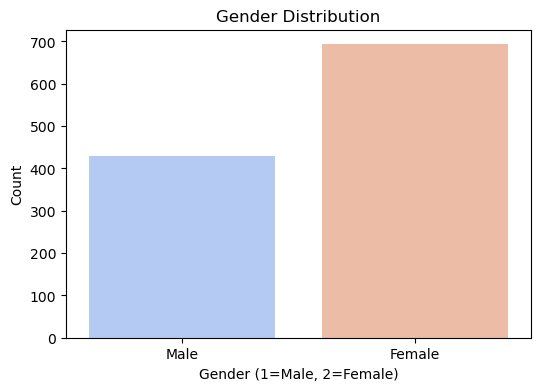

In [57]:
# Plot gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df1['gender'], palette="coolwarm")
plt.title("Gender Distribution")
plt.xlabel("Gender (1=Male, 2=Female)")
plt.ylabel("Count")
plt.show()

### Result--- Females are more interested in buying EV then Males

In [58]:
# Mapping age categories to their respective age groups
age_mapping = {1: "18-24 years", 2: "25-31 years", 3: "32-38 years", 4: "38+ years"}
df1['age'] = df1['age'].map(age_mapping)

# Verify the changes
df1['age'].unique()

array(['18-24 years', '25-31 years', '32-38 years', '38+ years'],
      dtype=object)

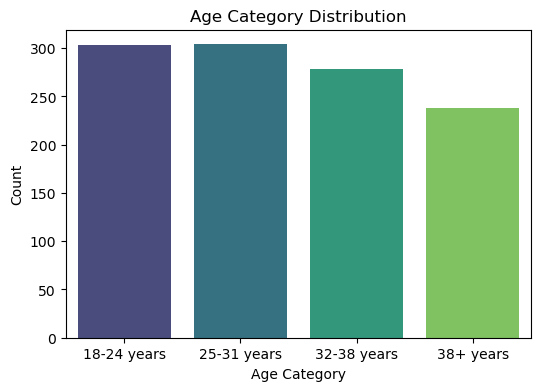

In [59]:
# Plot age category distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df1['age'], palette="viridis")
plt.title("Age Category Distribution")
plt.xlabel("Age Category")
plt.ylabel("Count")
plt.show()

### Result---Young people from age 18-31 years are more interested in buying EVs as compare to older people

# Analysis On the basis of Knowledge,Attitude and Practice (KAP)

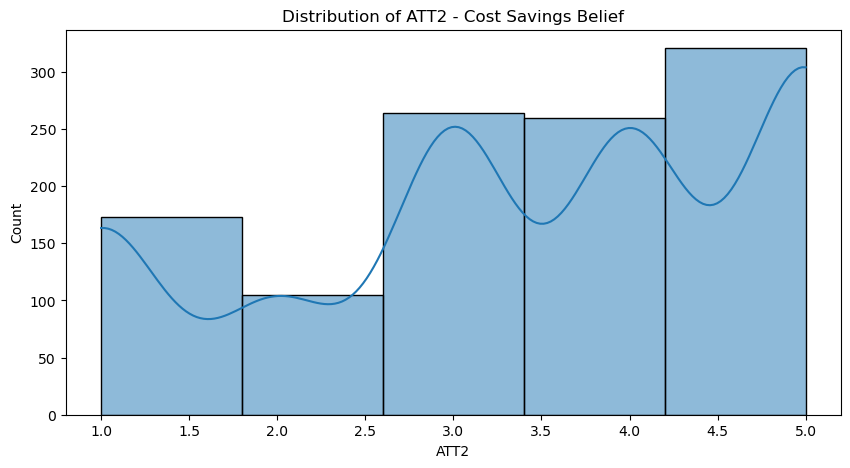

In [8]:
plt.figure(figsize=(10,5))
sns.histplot(responses['ATT2'], bins=5, kde=True)
plt.title("Distribution of ATT2 - Cost Savings Belief")
plt.show()

### Result---We can see most of the people have neutral to strongly disagree (negative) response that ev is a cost saving option

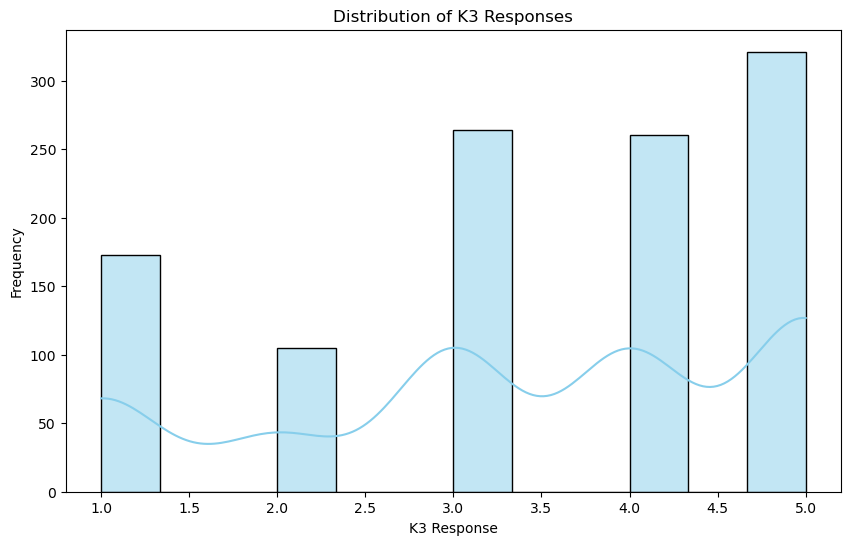

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(data=responses, x='K3', kde=True, color='skyblue')
plt.title('Distribution of K3 Responses')
plt.xlabel('K3 Response')
plt.ylabel('Frequency')
plt.show()

### Result---Most of the people are unaware of govt policies

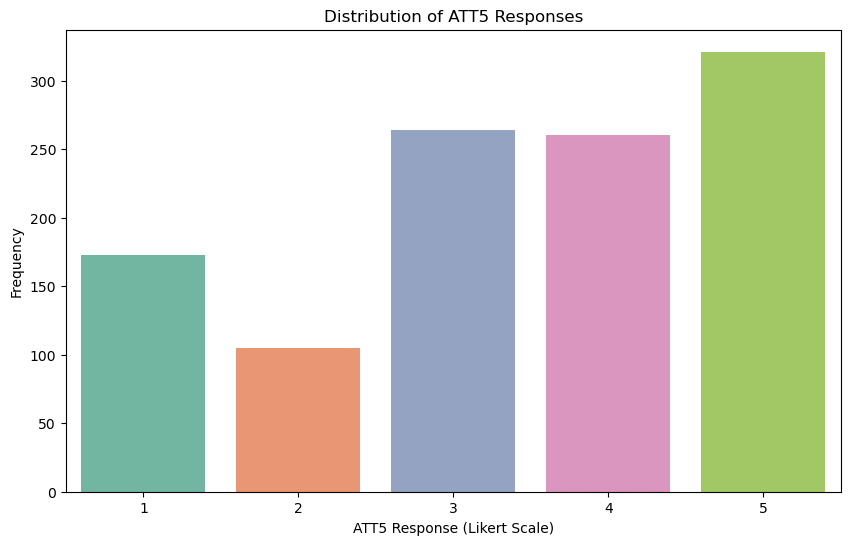

In [46]:
plt.figure(figsize=(10, 6))
sns.countplot(x='ATT5', data=responses, palette='Set2')
plt.title('Distribution of ATT5 Responses')
plt.xlabel('ATT5 Response (Likert Scale)')
plt.ylabel('Frequency')
plt.show()

### Result---Charging Infrastructures are not peoperly distributed in India

<Axes: >

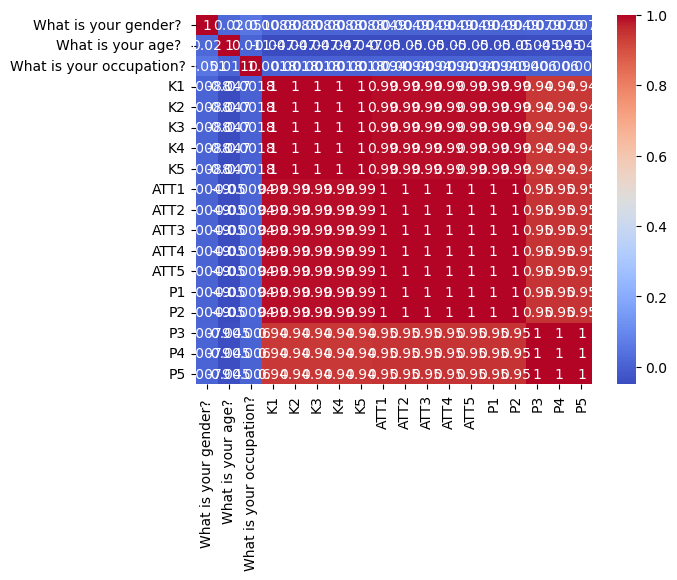

In [13]:
sns.heatmap(responses.corr(), annot=True, cmap='coolwarm')

Text(0.5, 1.0, 'Do men and women search for EVs differently?')

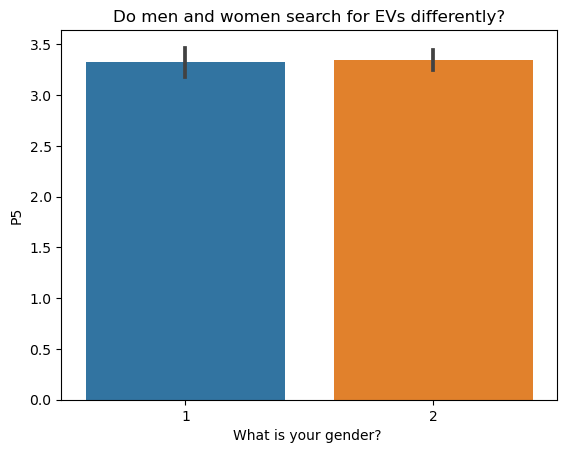

In [15]:
sns.barplot(x='What is your gender? ', y='P5', data=responses)
plt.title("Do men and women search for EVs differently?")

### result--Men and Women are equal likely search for ev options on digital platforms

## Feature Selection 

#### Since our goal is clustering for segmentation, we choose only relevant features  
 K3 (Awareness of Government Incentives)  
 ATT2 (Belief in Cost Savings of EVs)  
 ATT5 (Importance of Charging Infrastructure)  
 P4 (Total Cost of Ownership Consideration)  
 P5 (Active Search for EVs Online)  

In [16]:
features = responses[['K3', 'ATT2', 'ATT5', 'P4', 'P5']]

## Clustering

In [17]:
# Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

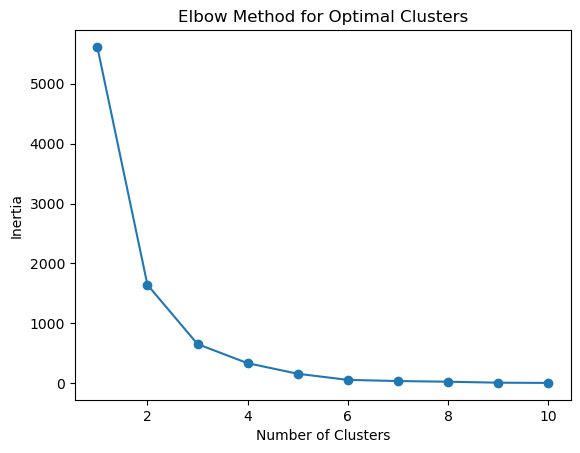

In [18]:
# Use elbow method to find optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()


### Result---As we can see the curve vend down sharply till 3 to 4 so lets take k=4

## Cluster Interpretation and Business Insights

In [27]:
from sklearn.decomposition import PCA
# Apply PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features_scaled)

# Convert PCA result into a DataFrame
pca_df = pd.DataFrame(pca_features, columns=['PCA1', 'PCA2'])

# Merge PCA components back to responses DataFrame
responses[['PCA1', 'PCA2']] = pca_df

In [29]:
# Define the number of clusters (we found 4 to be optimal)
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit K-Means on PCA-transformed data
responses['Cluster'] = kmeans.fit_predict(responses[['PCA1', 'PCA2']])

# Check if clustering is successful
print(responses[['PCA1', 'PCA2', 'Cluster']].head())


C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


       PCA1      PCA2  Cluster
0  3.802297 -0.071370        2
1  2.202258 -0.062362        2
2  3.802297 -0.071370        2
3  2.202258 -0.062362        2
4  0.602220 -0.053354        0


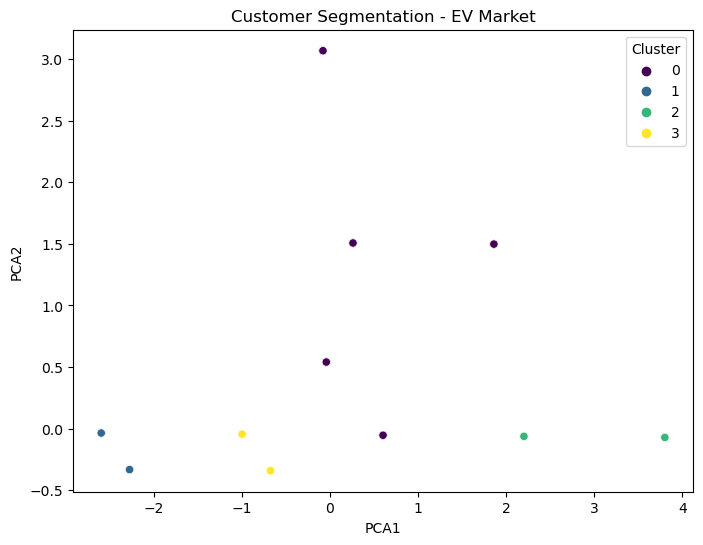

In [40]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=responses, palette='viridis')
plt.title("Customer Segmentation - EV Market")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

In [35]:
selected_columns = ['K3', 'ATT2', 'ATT5', 'P4', 'P5', 'Cluster']
cluster_analysis = responses[selected_columns].groupby('Cluster').mean()
print(cluster_analysis)

               K3      ATT2      ATT5        P4        P5
Cluster                                                  
0        3.156028  3.099291  3.099291  2.843972  2.843972
1        4.974277  5.000000  5.000000  5.000000  5.000000
2        1.377698  1.377698  1.377698  1.377698  1.377698
3        3.968254  4.000000  4.000000  4.000000  4.000000


# Cluster Wise Interpretation

Cluster 0 (Neutral-Minded Customers)  
Cluster 1 (EV Enthusiasts / High Intent Buyers)  
Cluster 2 (Skeptics / Least Interested Customers)  
Cluster 3 (Potential EV Adopters)  

# Conclusion

"In India,the most potential buyers of electric vehicles are:   
1. Gender-Females are more interested in buying EVs as compare to male  
2. Age- People of young age(18-31) are more buyers of EVs then older age people  
3. KAP-likely to be individuals who show a moderate to strong   understanding of the environmental and financial benefits of   EVs, as seen in Cluster 1 (Innovators) and Cluster 4 (Moderate   Attitude Group). These customers are ready to make the switch,  especially with the right incentives and product offerings.   Meanwhile, late adopters (Cluster 2) and the more cautious segment  (Cluster 3) require targeted education, infrastructure     development, and reassurance about long-term cost savings before they  consider EVs as a viable option."    